In [1]:
#Importando as bibliotecas:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 5)

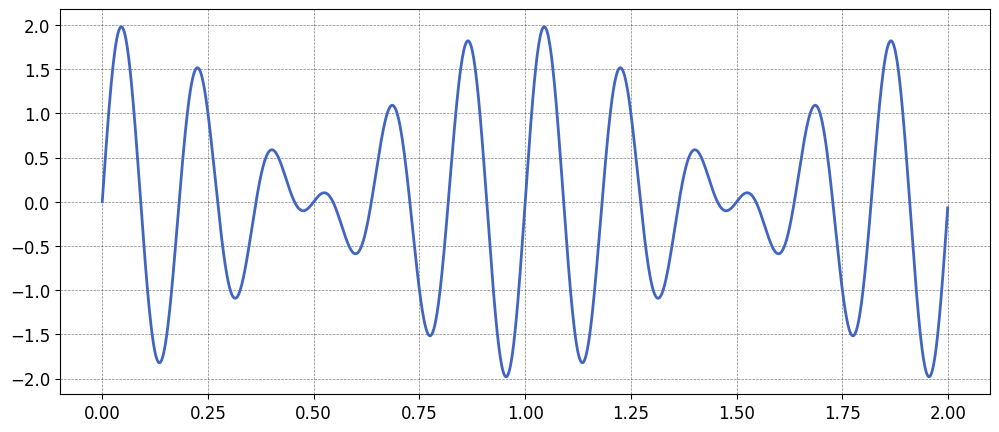

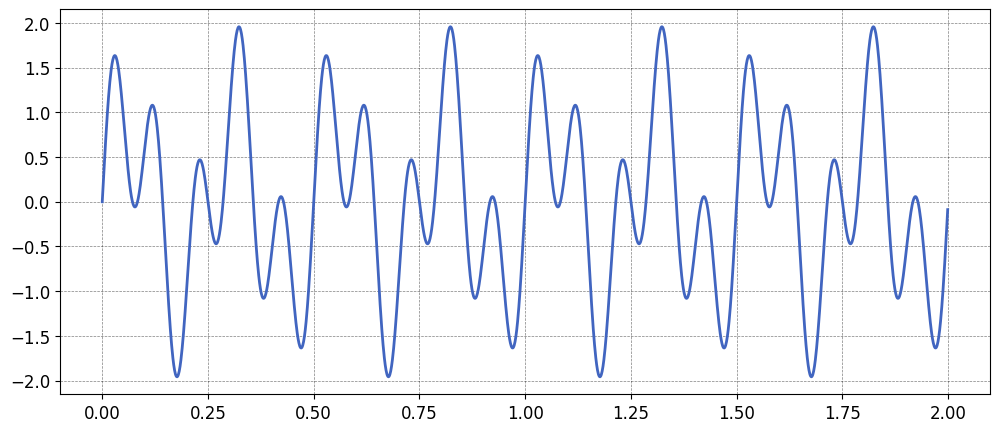

In [2]:
# Definição sinais
t = np.arange(0, 2, 1e-3)
sig1 = np.sin(2*np.pi*5*t)+np.sin(2*np.pi*6*t)
plt.figure(1)
plt.plot(t,sig1)
plt.show()
sig2 = np.sin(2*np.pi*4*t)+np.sin(2*np.pi*10*t)
plt.figure(2)
plt.plot(t,sig2)
plt.show()
port1 = np.sin(2*np.pi*100*t)
port2 = np.sin(2*np.pi*300*t)

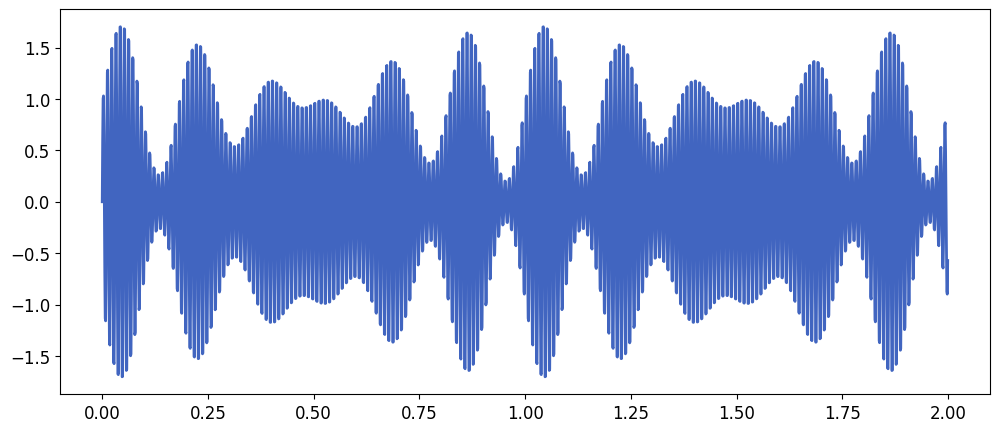

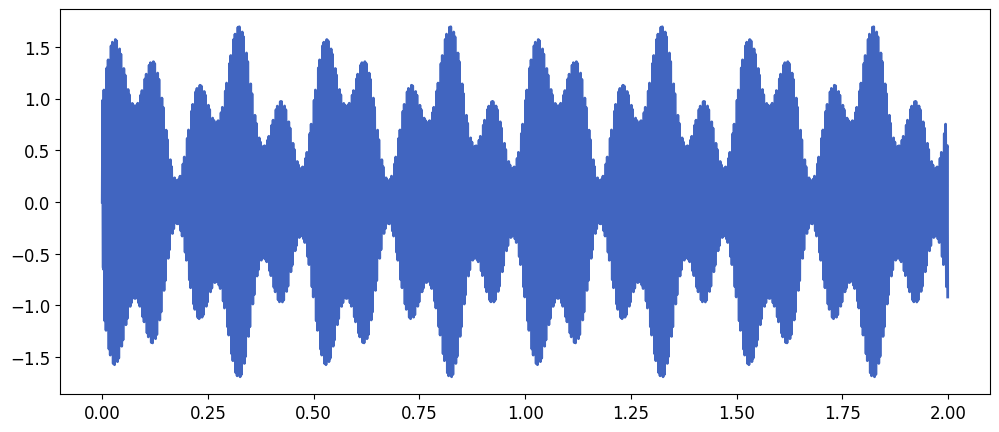

In [3]:
#Modulação:
mu = 0.4
tamV = len(t)
sig1M = np.multiply((np.ones(tamV)+mu*sig1),port1)
plt.figure(3)
plt.plot(t,sig1M)
plt.grid()
sig2M = np.multiply((np.ones(tamV)+mu*sig2),port2)
plt.figure(4)
plt.plot(t,sig2M)
plt.grid()

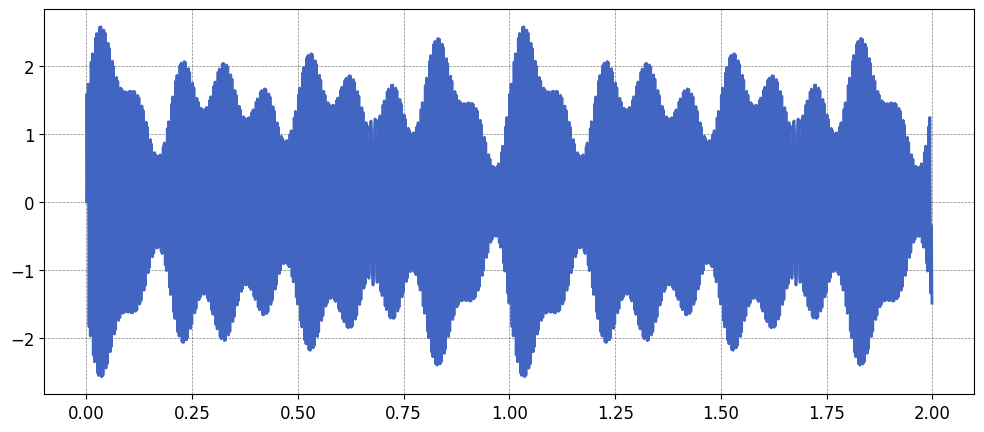

In [4]:
#Sinal a ser transmitido:
sigT = sig1M+sig2M
plt.figure(5)
plt.plot(t,sigT)
plt.show()

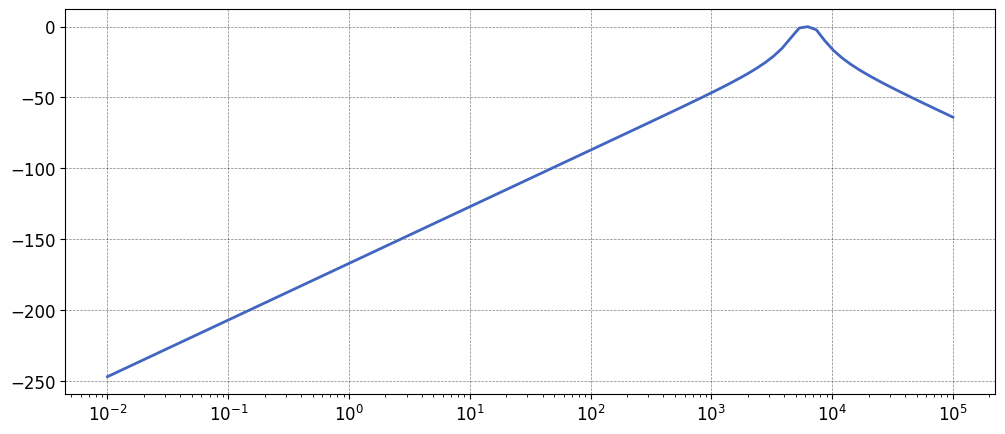

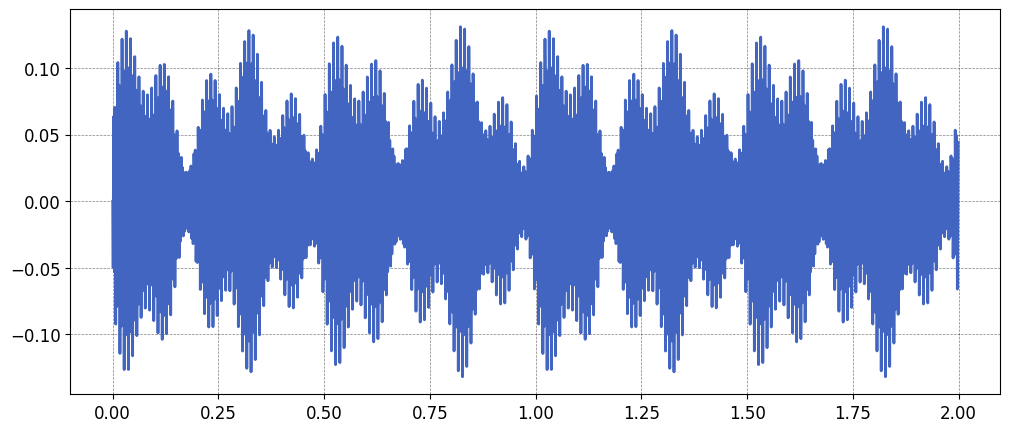

In [5]:
#Demodulação:
Nf = 2 #ordem do filtro
Wc = [2*np.pi*800, 2*np.pi*1200]
num, den = signal.butter(Nf, Wc, 'bandpass', analog=True)
Filt1 = signal.TransferFunction(num,den)
w, mag, phase = signal.bode(Filt1)
plt.figure(6)
plt.semilogx(w, mag)
tout, yout, xout = signal.lsim((num, den), U=sigT, T=t)
plt.figure(7)
plt.plot(tout, yout)

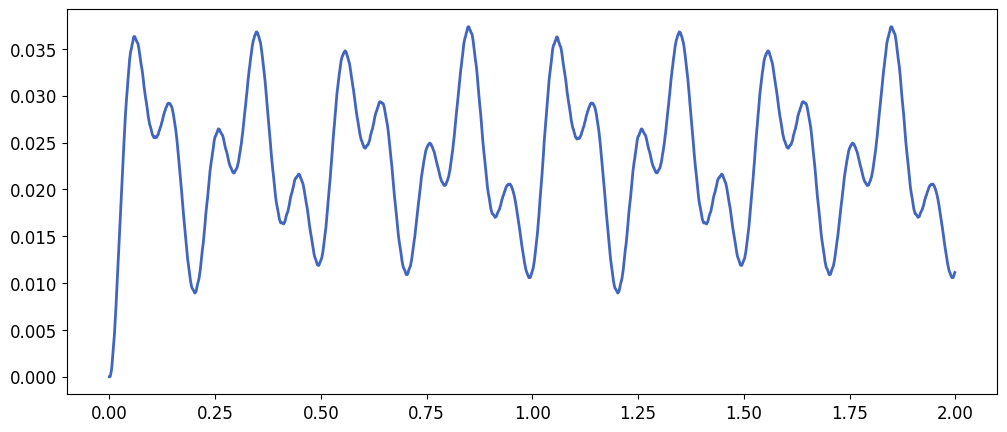

In [6]:
for i in range(tamV):
    if (yout[i]>=0):
        yout[i] = yout[i]
    else:
        yout[i] = 0

Nf = 2 #ordem do filtro
Wc = 2*np.pi*10
num, den = signal.butter(Nf, Wc, 'low', analog=True)
tout1, yout1, xout1 = signal.lsim((num, den), U=yout, T=t)
plt.figure(8)
plt.plot(t,yout1)
plt.grid()